In [4]:
!pip install geopandas
import pandas as pd  
import matplotlib.pyplot as plt
import geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 31.6 MB/s 
     |████████████████████████████████| 6.3 MB 43.4 MB/s 


In [5]:
rep = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Redditi_e_principali_variabili_IRPEF_su_base_comunale_CSV_2020.csv')
rep

,Anno di imposta,Codice catastale,Codice Istat Comune,Denominazione Comune,Sigla Provincia,Regione,Codice Istat Regione,Numero contribuenti,Reddito da fabbricati - Frequenza,Reddito da fabbricati - Ammontare in euro,...,Reddito complessivo da 26000 a 55000 euro - Frequenza,Reddito complessivo da 26000 a 55000 euro - Ammontare in euro,Reddito complessivo da 55000 a 75000 euro - Frequenza,Reddito complessivo da 55000 a 75000 euro - Ammontare in euro,Reddito complessivo da 75000 a 120000 euro - Frequenza,Reddito complessivo da 75000 a 120000 euro - Ammontare in euro,Reddito complessivo oltre 120000 euro - Frequenza,Reddito complessivo oltre 120000 euro - Ammontare in euro,field_51,geometry
0,2020,A001,028001,ABANO TERME,PD,Veneto,05,14831,7564,9593119,...,3268,114839495,413,26106754,400,37267762,177,35077122,,None
1,2020,A004,098001,ABBADIA CERRETO,LO,Lombardia,03,208,89,78204,...,41,1302555,,,,,0,0,,None
2,2020,A005,097001,ABBADIA LARIANA,LC,Lombardia,03,2451,1205,1802637,...,656,22609959,78,4903386,48,4323860,31,5299024,,None
3,2020,A006,052001,ABBADIA SAN SALVATORE,SI,Toscana,09,4855,2667,2731533,...,754,25651776,69,4391549,33,3001230,13,2879460,,None
4,2020,A007,095001,ABBASANTA,OR,Sardegna,20,1728,885,739857,...,430,14325272,26,1655926,13,1172342,,,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,2020,M428,075098,PRESICCE-ACQUARICA,LE,Puglia,16,6251,2376,2132368,...,580,19690477,31,1911397,25,2212573,15,3447739,,None
7900,2020,M429,022252,BORGO D'ANAUNIA,TN,Trentino Alto Adige(P.A.Trento),04,2050,803,1304716,...,498,17366505,35,2265069,21,1848437,8,1959769,,None
7901,2020,M430,022253,NOVELLA,TN,Trentino Alto Adige(P.A.Trento),04,3579,1210,1659890,...,667,22868038,40,2490656,31,2852464,10,1876163,,None
7902,2020,M431,022254,VILLE DI FIEMME,TN,Trentino Alto Adige(P.A.Trento),04,2102,896,1015747,...,497,17515916,47,2946010,21,2064994,20,3869894,,None


## 1. l'ammontare del reddito da lavoro dipendente (colonna L del dataset) per ogni regione e relativo grafico a torta

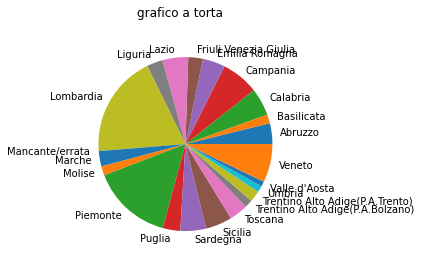

In [21]:
ammontarereddito = rep.groupby("Regione",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count()


fig = plt.figure()
ax = plt.axes()
ax.pie(ammontarereddito["Reddito da lavoro dipendente e assimilati - Ammontare in euro"],labels = ammontarereddito["Regione"])

fig.suptitle("grafico a torta")

plt.show()

## 2. l'ammontare del reddito da lavoro dipendente per ogni provincia e relativo grafico a barre verticali


No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

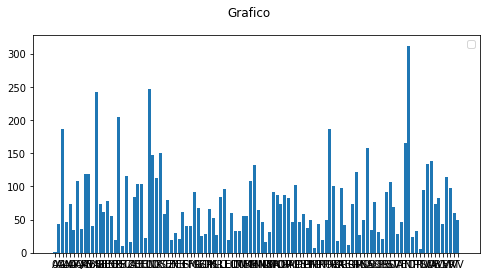

In [28]:
ammontarereddito = rep.groupby("Sigla Provincia",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count()


fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.bar(ammontarereddito['Sigla Provincia'],ammontarereddito['Reddito da lavoro dipendente e assimilati - Ammontare in euro'])
ax.legend()
plt.suptitle("Grafico")
plt.show

## 3. la prime 10 province più ricche

In [31]:
ammontarereddito = rep.groupby("Sigla Provincia",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].sum()
ammontarereddito.sort_values(by=["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]).head(9)

,Sigla Provincia,Reddito da lavoro dipendente e assimilati - Ammontare in euro
37,FR,1011221105626803941195176051347143091842260038...
83,SA,1050675911069554828771479268235434840512250181...
34,FG,1058218827847644697626590811213120995211298290...
8,AT,1094223930684621273848371568803475788582539634...
38,GE,1109627021937216918622436417195391006560941272...
62,PA,1129181062821853876076471530784977099122297302...
17,BS,1136975964532944151553161965104331884691833191...
49,LU,1143311793090269476728331504074562099812401566...
100,VA,1153303451166394319925257932518432440024769733...


## 4. la provincia più ricca

In [33]:
ammontarereddito.sort_values(by=["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]).head(1)

,Sigla Provincia,Reddito da lavoro dipendente e assimilati - Ammontare in euro
37,FR,1011221105626803941195176051347143091842260038...


## 5. il reddito medio per ogni regione. Ordinare in ordine decrescente a partire dalla regione con il reddito medio più alto

## 6. dato il nome di una regione, inserito dall'utente, avere l'elenco delle province della regione con il reddito complessivo e il reddito medio

In [42]:
reg= input()
repreg= rep[rep['Regione']==reg]['Sigla Provincia'].drop_duplicates()

Lombardia


1      LO
2      LC
6      MI
25     BS
27     MN
28     CR
44     BG
67     VA
68     MB
94     PV
110    SO
114    CO
Name: Sigla Provincia, dtype: object